In [9]:
# Part 1A: We have two bases for R^2: B = {(-4, 1), (1, 5)} and D = {(-1, 1), (1, 2)}

# Find the change of basis matrix from B to D.

import numpy as np

# Create matrices directly from the basis vectors
B = np.array([[-4, 1],
              [1, 5]])  # Each column represents a basis vector
D = np.array([[-1, 1],
              [1, 2]])  # Each column represents a basis vector

# The change of basis matrix P from B to D is found by:
# P = D^(-1)B
P = np.linalg.inv(D) @ B

print("Change of basis matrix from B to D:")
print(P)

# Let's verify this is correct by checking that D @ P = B
# This should be true since P transforms vectors from B coordinates to D coordinates
verification = D @ P
print("\nVerification - D @ P should equal B:")
print("D @ P =")
print(verification)
print("\nOriginal B =")
print(B)
print("\nAre they equal?")
print(np.allclose(verification, B))  # Using allclose to handle floating point errors


Change of basis matrix from B to D:
[[ 3.  1.]
 [-1.  2.]]

Verification - D @ P should equal B:
D @ P =
[[-4.  1.]
 [ 1.  5.]]

Original B =
[[-4  1]
 [ 1  5]]

Are they equal?
True


In [12]:
# Part 1B: Find representation of v1 relative to basis B and compute A * v1_B

import numpy as np

# Original vector v1 in standard basis E2
v1_E2 = np.array([-10, 13])

# Basis B from previous part
B = np.array([[-4, 1],
              [1, 5]])

# Find v1 relative to basis B by solving B @ x = v1_E2
v1_B = np.linalg.solve(B, v1_E2)

print("v1 relative to basis B:")
print(v1_B)

# Matrix A from part A
A = np.array([[3, 1],
              [-1, 2]])

# Compute A * v1_B
result = A @ v1_B

print("\nA * v1_B:")
print(result)


v1 relative to basis B:
[3. 2.]

A * v1_B:
[11.  1.]


In [14]:
# Part 1C: Show that your answer to part B is the representation of v1 relative to D.

# First, let's find v1 relative to basis D by solving D @ x = v1_E2
v1_D = np.linalg.solve(D, v1_E2)

print("v1 relative to basis D:")
print(v1_D)

print("\nResult from part B (A * v1_B):")
print(result)

print("\nAre they equal?")
print(np.allclose(v1_D, result))  # Using allclose for floating point comparison

v1 relative to basis D:
[11.  1.]

Result from part B (A * v1_B):
[11.  1.]

Are they equal?
True


In [16]:
# Part 2a: Find the projection of the vector (2 -3 2) onto the line determined by k*(1 2 1)

# Define vectors
v = np.array([2, -3, 2])  # Vector to project
u = np.array([1, 2, 1])   # Direction vector of the line
print("Vector to project v:", v)
print("Direction vector u:", u)

# Calculate dot product v·u
dot_product = np.dot(v, u)
print("\nDot product v·u:", dot_product)

# Calculate magnitude squared of u (u·u)
u_magnitude_squared = np.dot(u, u)
print("Magnitude squared of u (u·u):", u_magnitude_squared)

# Calculate scaling factor (v·u)/(u·u)
scaling_factor = dot_product / u_magnitude_squared
print("\nScaling factor (v·u)/(u·u):", scaling_factor)

# Calculate final projection
projection = scaling_factor * u
print("\nFinal projection (scaling_factor * u):")
print(projection)


Vector to project v: [ 2 -3  2]
Direction vector u: [1 2 1]

Dot product v·u: -2
Magnitude squared of u (u·u): 6

Scaling factor (v·u)/(u·u): -0.3333333333333333

Final projection (scaling_factor * u):
[-0.33333333 -0.66666667 -0.33333333]


In [17]:
# Part 2b: A person standing at (2 -3 2) has a piece of rope that is 4 units long. Is the rope long enough to reach a friend standing at the projection from part a?

# Calculate the distance between the points using the distance formula
distance = np.linalg.norm(v - projection)
print(f"Distance between points: {distance}")

# Check if rope is long enough
rope_length = 4
is_long_enough = distance <= rope_length
print(f"\nIs the {rope_length} unit rope long enough?")
print(f"{'Yes' if is_long_enough else 'No'}, the distance is {distance:.2f} units")

Distance between points: 4.041451884327381

Is the 4 unit rope long enough?
No, the distance is 4.04 units


Matrix B:
[[ 3  3]
 [-1  1]]

Determinant of B: 6.0


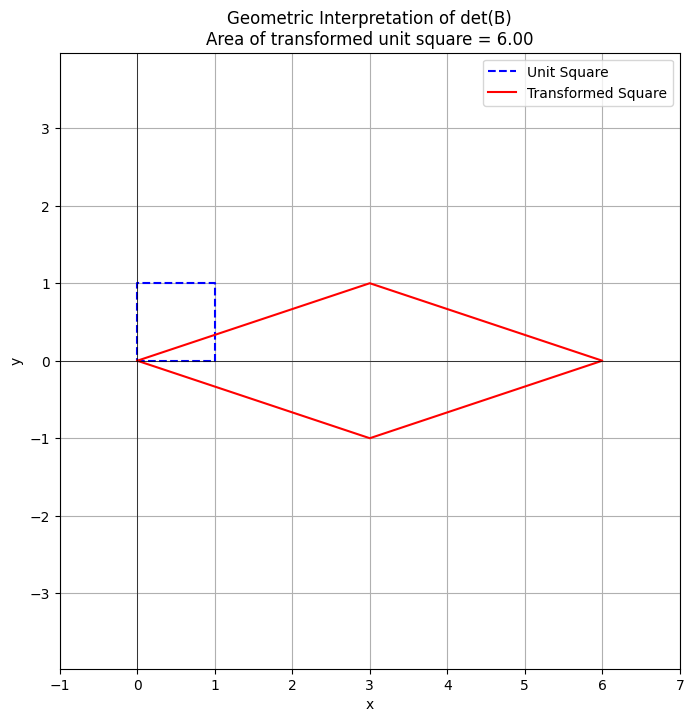

In [21]:
# Part 3: Compute the determinant of matrix B = [3 3; -1 1]
import matplotlib.pyplot as plt

# Define matrix B
B = np.array([[3, 3],
              [-1, 1]])
print("Matrix B:")
print(B)

# Calculate determinant
det_B = np.linalg.det(B)
print("\nDeterminant of B:", det_B)

# Create a plot to visualize the matrix transformation
plt.figure(figsize=(8, 8))

# Plot unit square vertices
unit_square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
plt.plot(unit_square[:, 0], unit_square[:, 1], 'b--', label='Unit Square')

# Transform unit square vertices using matrix B
transformed_square = np.dot(unit_square, B.T)
plt.plot(transformed_square[:, 0], transformed_square[:, 1], 'r-', 
         label='Transformed Square')

# Add grid and labels
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Geometric Interpretation of det(B)\n'
          f'Area of transformed unit square = {abs(det_B):.2f}')
plt.legend()

# Set equal aspect ratio and reasonable limits
plt.axis('equal')
plt.xlim(-1, 7)
plt.ylim(-4, 4)

plt.show()
